In [14]:
#Importing the necessary libraries
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

# Calculating Cumulative Count Cut
def scaleCCC(x):
    return((x - np.nanpercentile(x, 2))/(np.nanpercentile(x, 98) - np.nanpercentile(x,2)))

def applyCCC(images_list):
  images_open = []

  # Opening the satellite images
  for img_name in images_list:
    img_open = gdal.Open('./ALL_FLOOD_256/'+img_name)
    # Extracting individual bands(4,8,12) from the uploaded images
    band4 = img_open.GetRasterBand(1).ReadAsArray()
    band8 = img_open.GetRasterBand(2).ReadAsArray()
    band12 = img_open.GetRasterBand(3).ReadAsArray()
    ccc4 = scaleCCC(band4)
    ccc8 = scaleCCC(band8)
    ccc12 = scaleCCC(band12)
    # Creating a new images by combining the three bands 
    images_open.append(np.dstack((ccc4,ccc8,ccc12)))  

  return images_open

from sklearn.cluster import OPTICS
trained_optics = OPTICS(min_samples=80, xi=.05, min_cluster_size=.02)

# Reshaping the images
def optics(trained_optics):
  reshaped_images=[]
  for i in range(len(all_images_array)):
    new_shape = (all_images_array[i].shape[0] * all_images_array[i].shape[1], all_images_array[i].shape[2])
    new_image = all_images_array[i][:, :, :3].reshape(new_shape)
    reshaped_images.append(new_image)

  #concatenating all the arrays
  combined_image = reshaped_images[0]
  for i in range(1, len(reshaped_images)):
    combined_image = np.concatenate((combined_image, reshaped_images[i]), axis=0)

  # Removing nan values
  combined_image2 = np.nan_to_num(combined_image)

  X_before = combined_image2

  # Running optics Algorithm on train image
  trained_optics= trained_optics.fit(X_before)
  X_cluster_before = trained_optics.labels_

  return trained_optics

In [15]:
success = True

In [5]:
try:
  for i in range(2,3):
    #List of all the images
    images_list=[str(i)+ "_P_256.tif",str(i) +"_A_256.tif"]
    all_images_array = applyCCC(images_list)
    trained_optics = optics(trained_optics)
except:
  success = False

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


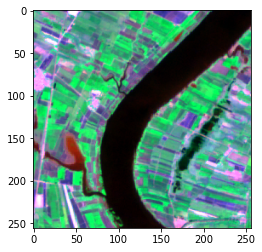

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


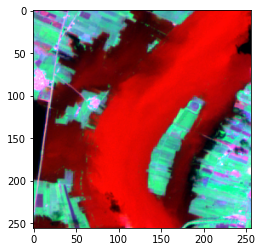

In [9]:
# Visualizing the images
for img in all_images_array:
  plt.figure()
  plt.imshow(img)
  plt.show()

In [17]:
import sys
sys.argv = [{"trained_optics_val": trained_optics,"successful_execution":success}]
execfile("mailing.py")

Sending mail to: {'To': 'devansh.ts@somaiya.edu', 'Cc': 'sparshtgupta@gmail.com,hardikriyasparsh@gmail.com', 'Bcc': ''}
Mail sent successfully! Sent at: 2023-02-20 15:40:24.918642
